In [1]:
hum <- read.table("~/workspace/master-thesis/data/processed/humsavar_protparam_gt.tab.gz", sep="\t", header=TRUE)

## Correlations

In [2]:
library('corrplot')

corrplot 0.84 loaded


In [3]:
Mpearson <- cor(hum[sapply(hum, is.numeric)], method="pearson", use="complete.obs")
Mspearman <- cor(hum[sapply(hum, is.numeric)], method="spearman", use="complete.obs")
pval <- cor.mtest(hum[sapply(hum, is.numeric)], conf.level=.95)$p

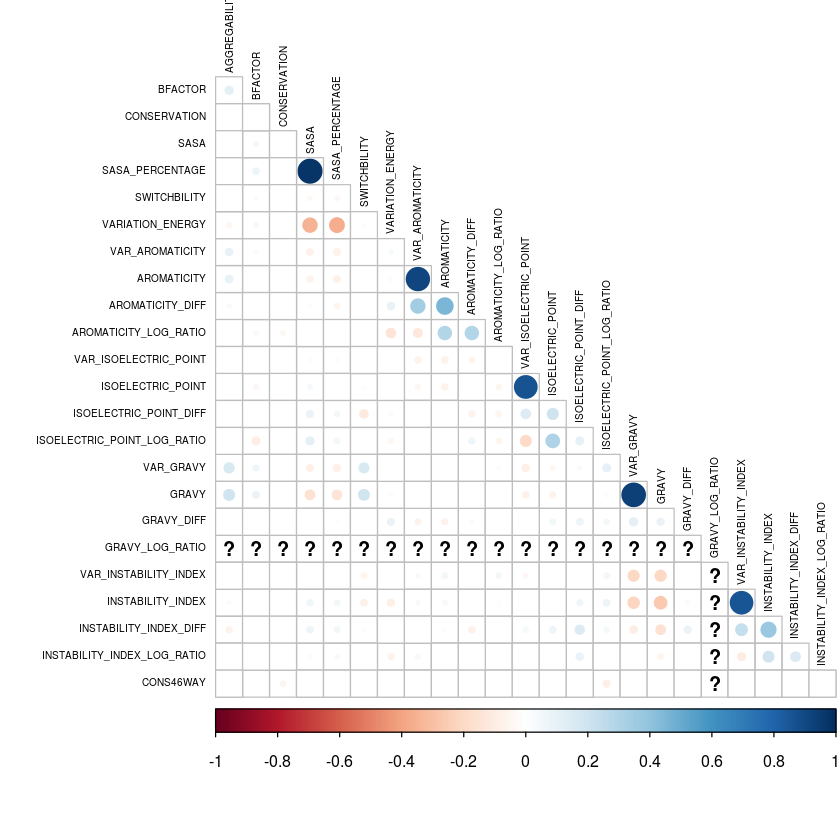

In [6]:
corrplot(Mpearson, p.mat=pval, insig="blank", type="lower", 
         diag=FALSE, tl.col="black", tl.srt=90, tl.cex=0.5, sig.level=0.05)

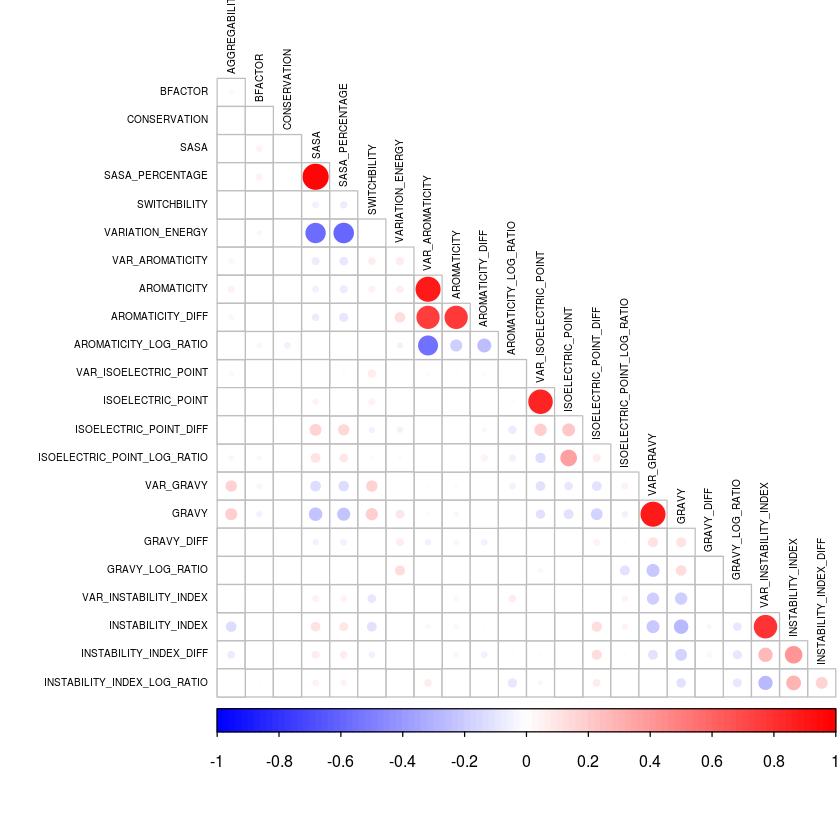

In [79]:
corrplot(Mspearman, p.mat=pval, insig="blank", type="lower", 
         diag=FALSE, tl.col="black", tl.srt=90, tl.cex=0.5, sig.level=.05,
         col=colorRampPalette(c("blue","white","red"))(100))

## AUC & Mann Whitney U-Test

In [1]:
library('pROC')

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [21]:
results <- read.table("../results/svc_results.csv", sep=",", header=TRUE)

In [8]:
help(roc)

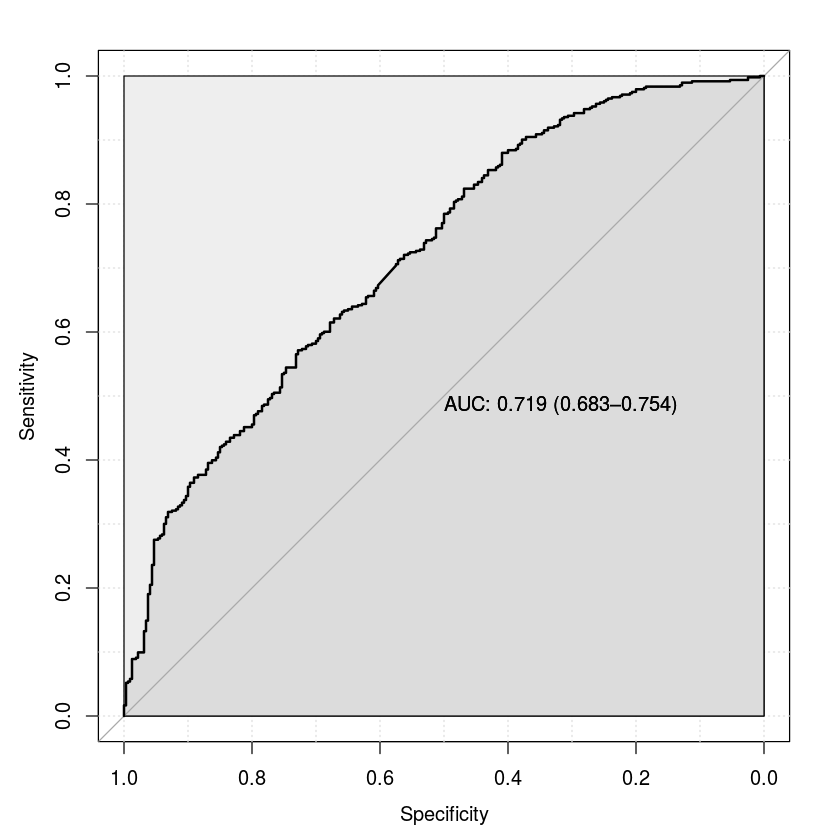

In [24]:
roc <- roc(results$y_true, results$score,
    ci=TRUE, boot.n=100, ci.alpha=0.9, stratified=FALSE,
    # arguments for plot
    plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
    print.auc=TRUE, show.thres=TRUE)